In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('Dados/dataset_2.csv')


In [4]:
# Check the shape of the DataFrame
df.shape


(500, 2)

In [5]:
# Display the column names of the DataFrame
df.columns


Index(['horas_estudo_mes', 'salario'], dtype='object')

In [7]:
# Display the first few rows of the DataFrame
df.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


In [8]:
# Display information about the DataFrame including the data types and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [9]:
# Check for missing values in the DataFrame and sum them up column-wise
df.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [10]:
# Generate descriptive statistics of the DataFrame
df.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [11]:
# Generate descriptive statistics for the column 'horas_estudo_mes'
df['horas_estudo_mes'].describe()


count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

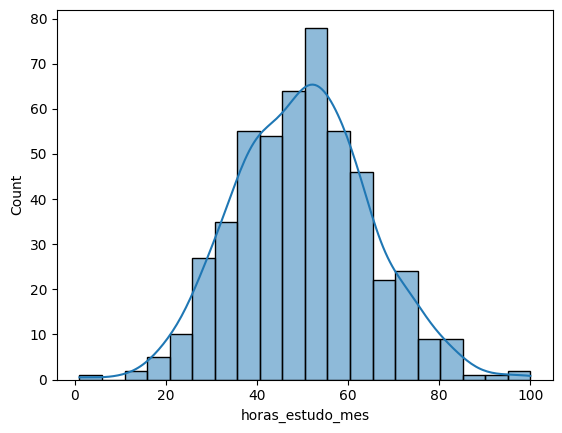

In [12]:
# Create a histogram with kernel density estimation for the column 'horas_estudo_mes'
sns.histplot(data=df, x="horas_estudo_mes", kde=True)


In [13]:
# Calculate the correlation matrix for all numerical columns in the DataFrame
df.corr()


,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


<Axes: xlabel='salario', ylabel='horas_estudo_mes'>

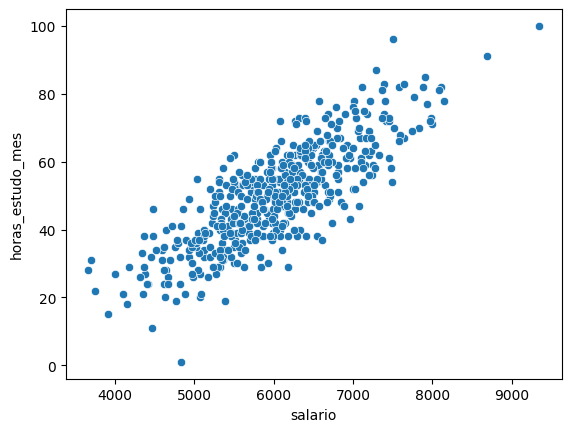

In [15]:
# Create a scatter plot to visualize the relationship between 'salario' and 'horas_estudo_mes'
sns.scatterplot(data=df, x="salario", y="horas_estudo_mes")

In [16]:
# Convert the 'horas_estudo_mes' column into a NumPy array
x = np.array(df['horas_estudo_mes'])


In [17]:
# Check the type of the variable x
type(x)

numpy.ndarray

In [18]:
# Reshape the array x into a 2-dimensional array with one column
x = x.reshape(-1, 1)


In [19]:
# Assign the 'salario' column to the variable y
y = df['salario']

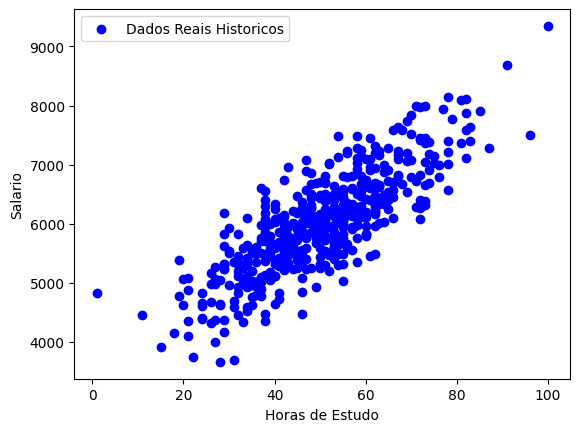

In [20]:
# Create a scatter plot to visualize the relationship between 'Horas de Estudo' and 'Salario'
plt.scatter(x, y, color='blue', label='Dados Reais Historicos')

# Label the x-axis
plt.xlabel("Horas de Estudo")

# Label the y-axis
plt.ylabel("Salario")

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [22]:
# Split the data into training and testing sets using train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)


In [23]:
# Check the shape of the training set for the independent variable x
x_treino.shape


(400, 1)

In [24]:
# Check the shape of the testing set for the independent variable x
x_teste.shape


(100, 1)

In [25]:
# Check the shape of the training set for the dependent variable y
y_treino.shape


(400,)

In [26]:
# Check the shape of the testing set for the dependent variable y
y_teste.shape


(100,)

In [27]:
# Instantiate a linear regression model
modelo = LinearRegression()


In [29]:
# Train the linear regression model using the training data
modelo.fit(x_treino, y_treino)


LinearRegression()

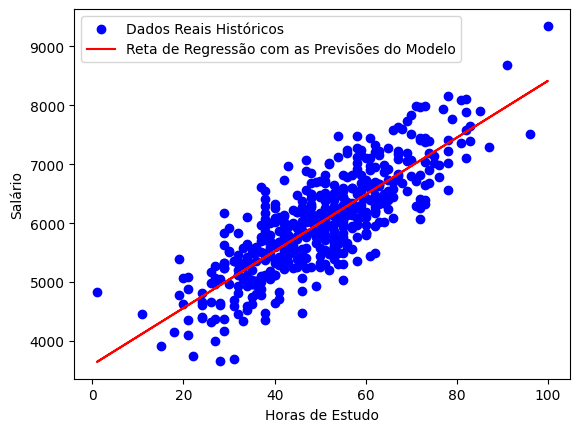

In [30]:
# Create a scatter plot of the historical data
plt.scatter(x, y, color="blue", label="Dados Reais Históricos")

# Plot the regression line with the model predictions
plt.plot(x, modelo.predict(x), color="red", label="Reta de Regressão com as Previsões do Modelo")

# Label the x-axis
plt.xlabel("Horas de Estudo")

# Label the y-axis
plt.ylabel("Salário")

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [31]:
# Calculate the R^2 coefficient for the model using the testing data
score = modelo.score(x_teste, y_teste)

# Print the R^2 coefficient
print(f"Coeficiente R^2: {score:.2f}")


Coeficiente R^2: 0.59


In [32]:
# Print the intercept of the linear regression model
print(modelo.intercept_)


3596.783724372753

In [33]:
# Print the coefficients of the linear regression model
print(modelo.coef_)


array([48.18185277])

In [34]:
# Define the new value for 'horas_estudo_mes' to make a prediction
horas_estudo_novo = np.array([[48]])

# Make a salary prediction using the linear regression model
salario_previsto = modelo.predict(horas_estudo_novo)

# Print the predicted salary for the given number of study hours
print(f"Se você estudar cerca de {horas_estudo_novo} horas por mês, seu salário pode ser igual a {salario_previsto}")


Se você estudar cerca de [[48]] horas por mês seu salário pode ser igual a [5909.5126574]


In [35]:
# Calculate the predicted salary using the formula for linear regression
salario = modelo.intercept_ + (modelo.coef_ * horas_estudo_novo)

# Print the predicted salary
print(salario)


[[5909.5126574]]


In [36]:
# Define the new value for 'horas_estudo_mes' to make a prediction
horas_estudo_novo = np.array([[65]])

# Make a salary prediction using the linear regression model
salario_previsto = modelo.predict(horas_estudo_novo)

# Print the predicted salary for the given number of study hours
print(f"Se você estudar cerca de {horas_estudo_novo} horas por mês, seu salário pode ser igual a {salario_previsto}")


Se você estudar cerca de [[65]] horas por mês seu salário pode ser igual a [6728.60415452]


In [37]:
# Define the new value for 'horas_estudo_mes' to make a prediction
horas_estudo_novo = np.array([[73]])

# Make a salary prediction using the linear regression model
salario_previsto = modelo.predict(horas_estudo_novo)

# Print the predicted salary for the given number of study hours
print(f"Se você estudar cerca de {horas_estudo_novo} horas por mês, seu salário pode ser igual a {salario_previsto}")


Se você estudar cerca de [[73]] horas por mês seu salário pode ser igual a [7114.05897669]
